# Data Science & Business Analytics Intern at The Sparks Foundation

# Author : Farjana Afroz Nila

# Task 4: Exploratory Data Analysis - Terrorism


# Objective:
● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● Find out the hot zones of terrorism.

● Derive all security issues and insights by EDA.

**Importing Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import matplotlib as mpl

**Importing Dataset from Online**

In [2]:
dataset=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')
print('Data is imported')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data is imported


In [3]:
dataset.head() #Reading the first 5 rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
dataset.shape # To know the rows & columns

(181691, 135)

In [5]:
#Filtering related columns
ds=dataset[["eventid","iyear","country_txt","region_txt","provstate","city","attacktype1_txt","targtype1_txt","gname","weaptype1_txt","nkill","nwound"]]
ds.head()

,eventid,iyear,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [6]:
#Renaming columns
ds=ds.rename(columns={"eventid":"Event_id","iyear":"Year","country_txt":"Country","region_txt":"Region","provstate":"State","city":"City","attacktype1_txt":"Attack_type","targtype1_txt":"target_type","gname":"Group_name","weaptype1_txt":"Weapon_type","nkill":"Killed","nwound":"Wounded"})
ds.head()


,Event_id,Year,Country,Region,State,City,Attack_type,target_type,Group_name,Weapon_type,Killed,Wounded
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [7]:
ds.isna().sum() # Cheacking null values

Event_id           0
Year               0
Country            0
Region             0
State            421
City             434
Attack_type        0
target_type        0
Group_name         0
Weapon_type        0
Killed         10313
Wounded        16311
dtype: int64

In [8]:
#Handling missing values
ds[["State","City"]]=ds[["State","City"]].fillna("Unknown")
ds[["Killed","Wounded"]]=ds[["Killed","Wounded"]].fillna(0)
ds.isna().sum()

Event_id       0
Year           0
Country        0
Region         0
State          0
City           0
Attack_type    0
target_type    0
Group_name     0
Weapon_type    0
Killed         0
Wounded        0
dtype: int64

In [9]:
ds['Casuality']=ds['Killed']+ds['Wounded'] #Forming a new column using wounded and killed columns

In [10]:
#Checking duplicate values
ds.duplicated().sum()

0

# Exploratory Data Analysis

# Most Affected Countries

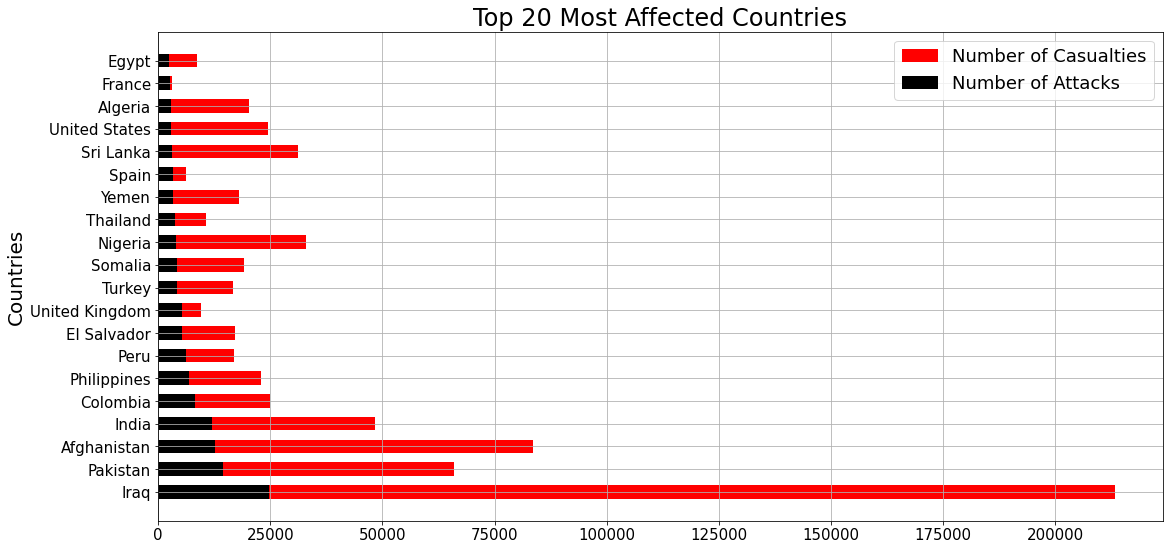

In [11]:
#Computing the terrorist attacks by countries and taking the top 20 observation
attacks_by_country=ds.groupby("Country")["Event_id"].count().nlargest(20)
#Computing casualties in those top countries
Casualties_by_country=(ds.groupby("Country")["Casuality"].sum())[attacks_by_country.index]

#visualizing number of attacks and casualties by country using bar chart
plt.figure(figsize=(18,9))
plt.barh(Casualties_by_country.index,Casualties_by_country,height=0.6,color="r")
plt.barh(attacks_by_country.index,attacks_by_country,height=0.6, color ="black")
plt.title("Top 20 Most Affected Countries",fontsize= 24)
plt.ylabel("Countries",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(["Number of Casualties","Number of Attacks"],fontsize=18)
plt.grid()
plt.show()

**Note: Iraq is affected by most of the attacks as well as casualties among the countries.**

# Most Affected Regions

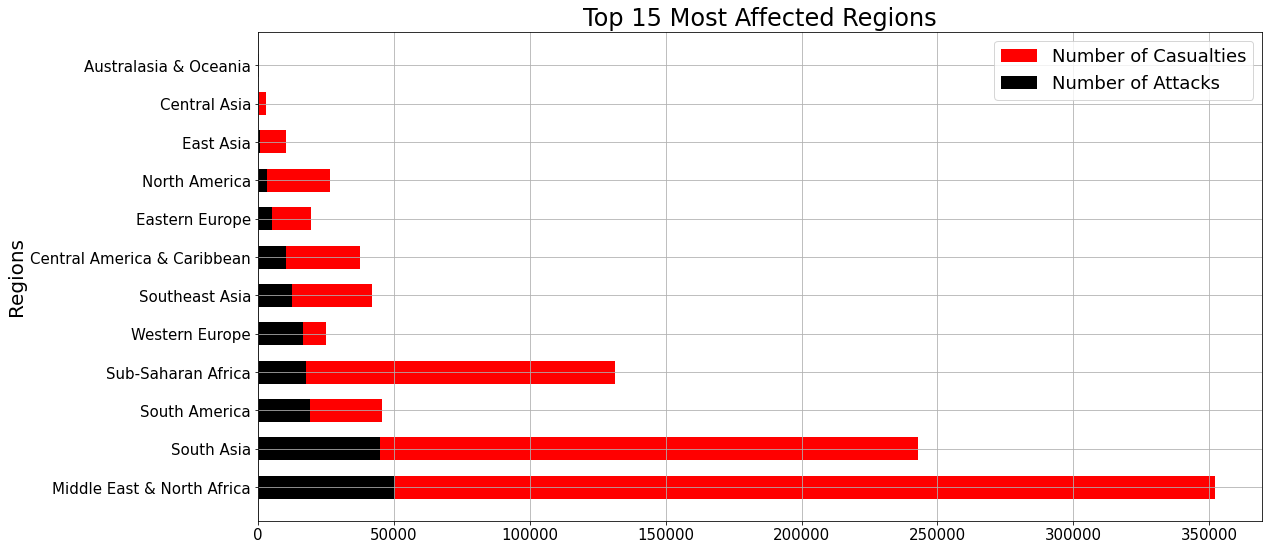

In [12]:
#Computing the terrorist attacks by regions and taking the top 15 observation
attacks_by_region=ds.groupby("Region")["Event_id"].count().nlargest(15)
#Computing casualties in those top regions
Casualties_by_region=(ds.groupby("Region")["Casuality"].sum())[attacks_by_region.index]

#visualizing attacks and casualties by Regions using bar chart

plt.figure(figsize=(18,9))
plt.barh(Casualties_by_region.index,Casualties_by_region,height=0.6,color="red")
plt.barh(attacks_by_region.index,attacks_by_region,height=0.6, color ='black')
plt.title("Top 15 Most Affected Regions",fontsize=24)
plt.ylabel("Regions",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(["Number of Casualties","Number of Attacks"],fontsize=18)
plt.grid()
plt.show()

**Note: Middle East and North Africa is affected by most of the attacks as well as casualties.**

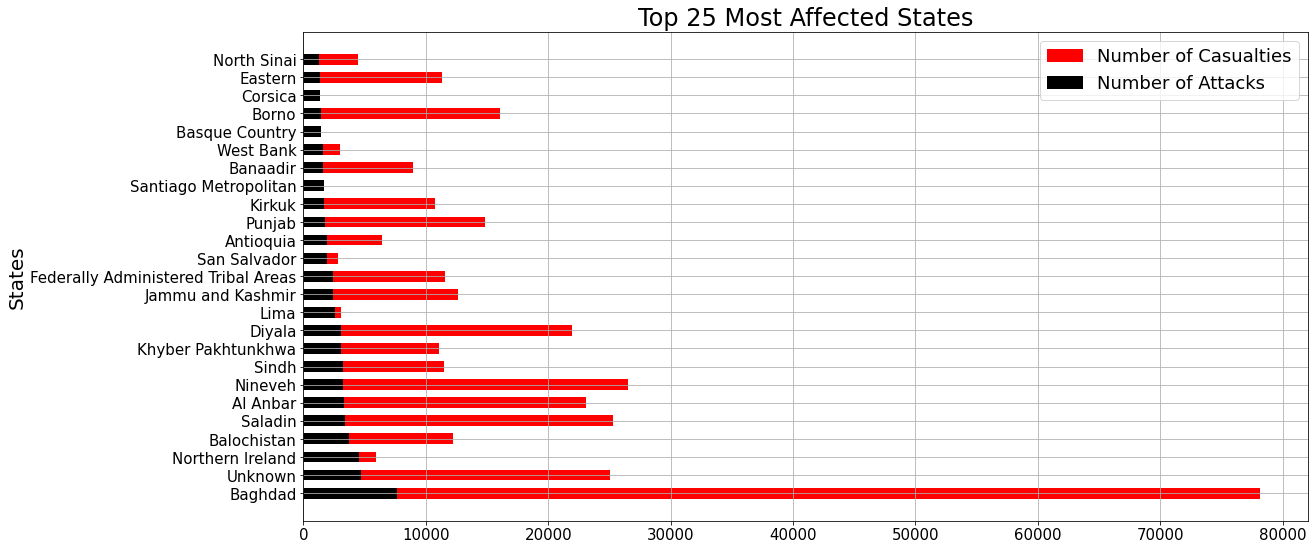

In [13]:
#Computing the terrorist attacks by States and taking the top 25 observation
attacks_by_states=ds.groupby("State")["Event_id"].count().nlargest(25)
#Computing casualties in those top states
Casualties_by_states=(ds.groupby("State")["Casuality"].sum())[attacks_by_states.index]

#visualization of attacks and casualties by States using bar chart

plt.figure(figsize=(18,9))
plt.barh(Casualties_by_states.index,Casualties_by_states,height=0.6,color="red")
plt.barh(attacks_by_states.index,attacks_by_states,height=0.6, color="black")
plt.title("Top 25 Most Affected States",fontsize=24)
plt.ylabel("States",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(["Number of Casualties","Number of Attacks"],fontsize=18)
plt.grid()
plt.show()

**Note : Baghdad is affected by most of the attacks as well as casualties.**

# Most Frequent Attacks Along Years

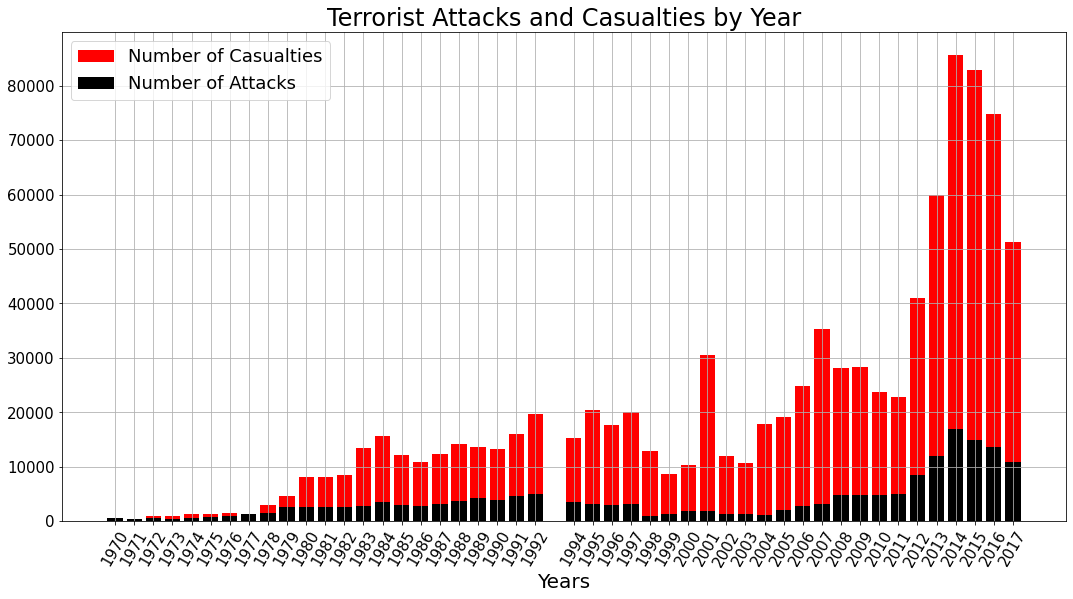

In [14]:
#Computing the terrorist attacks by Years and taking the top 15 observation
attacks_by_years=ds.groupby("Year")["Event_id"].count()
#Computing casualties in those top years
Casualties_by_years=(ds.groupby("Year")["Casuality"].sum())[attacks_by_years.index]

#visualizing attacks and casualties by years using bar chart

plt.figure(figsize=(18,9))
plt.bar(Casualties_by_years.index,Casualties_by_years,width=0.8,color="red")
plt.bar(attacks_by_years.index,attacks_by_years,width=0.8, color ='black')
plt.title("Terrorist Attacks and Casualties by Year",fontsize=24)
plt.xlabel("Years",fontsize=20)
plt.xticks(attacks_by_years.index,rotation=60,fontsize=15)
plt.yticks(fontsize=15)
plt.legend(["Number of Casualties","Number of Attacks"],fontsize=18)
plt.grid()
plt.show()

**Note: 2014 has the maximum number of attacks & maximum number of casualties.**

# Most Frequent Attack Type

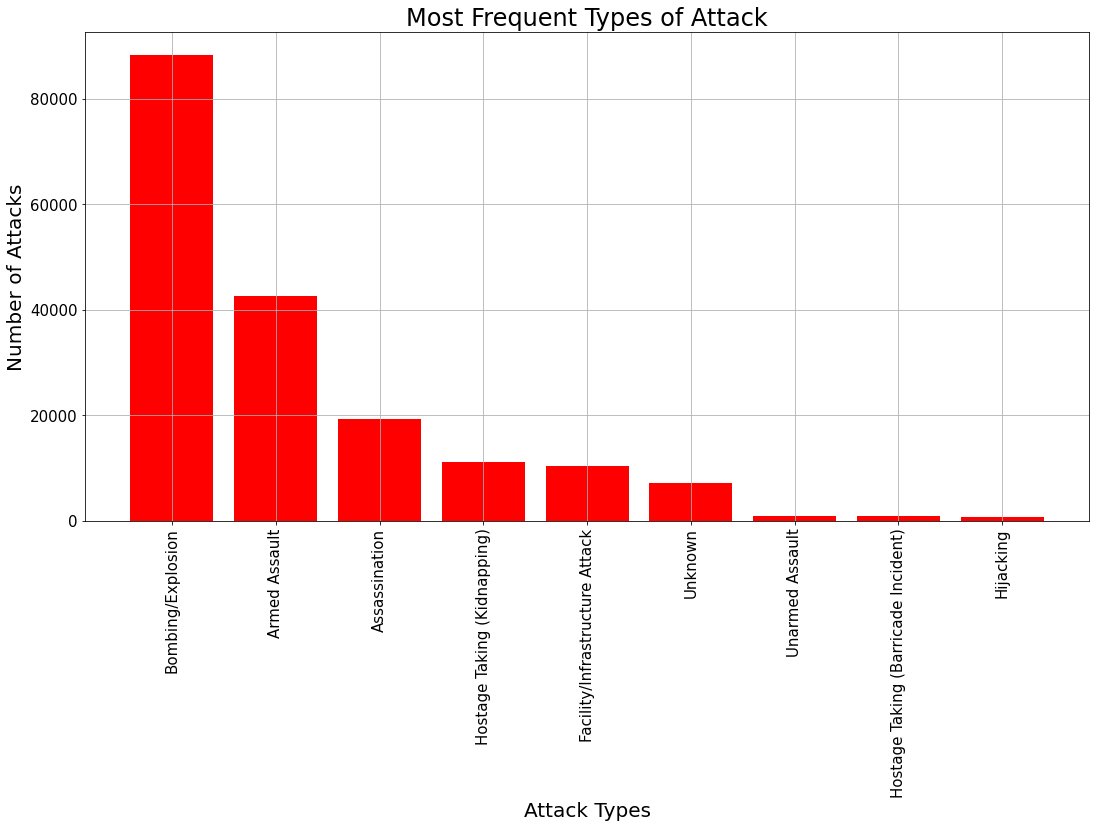

In [15]:
attack_type=ds.groupby("Attack_type")["Event_id"].count().nlargest(10)

plt.figure(figsize=(18,9))

plt.bar(attack_type.index,attack_type,width=0.8, color ='red')
plt.title("Most Frequent Types of Attack",fontsize=24)
plt.xlabel("Attack Types",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

**Note : Bombing/Explosion is the most happened attack genre**

# Most Common Targets

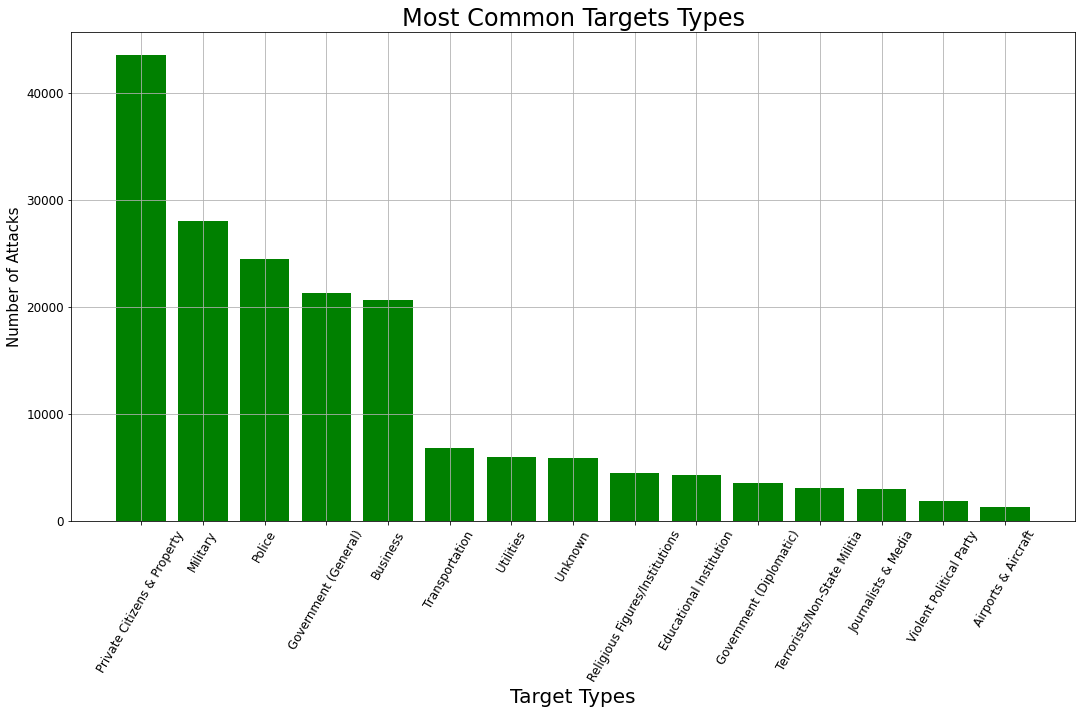

In [16]:
target_type=ds.groupby("target_type")["Event_id"].count().nlargest(15)

plt.figure(figsize=(18,9))
plt.bar(target_type.index,target_type,width=0.8, color = 'green')
plt.title("Most Common Targets Types",fontsize=24)
plt.xlabel("Target Types",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=15)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

**Note: Private Citizens and Properties are commonly targeted by terrorist groups**

# Most Common Targets

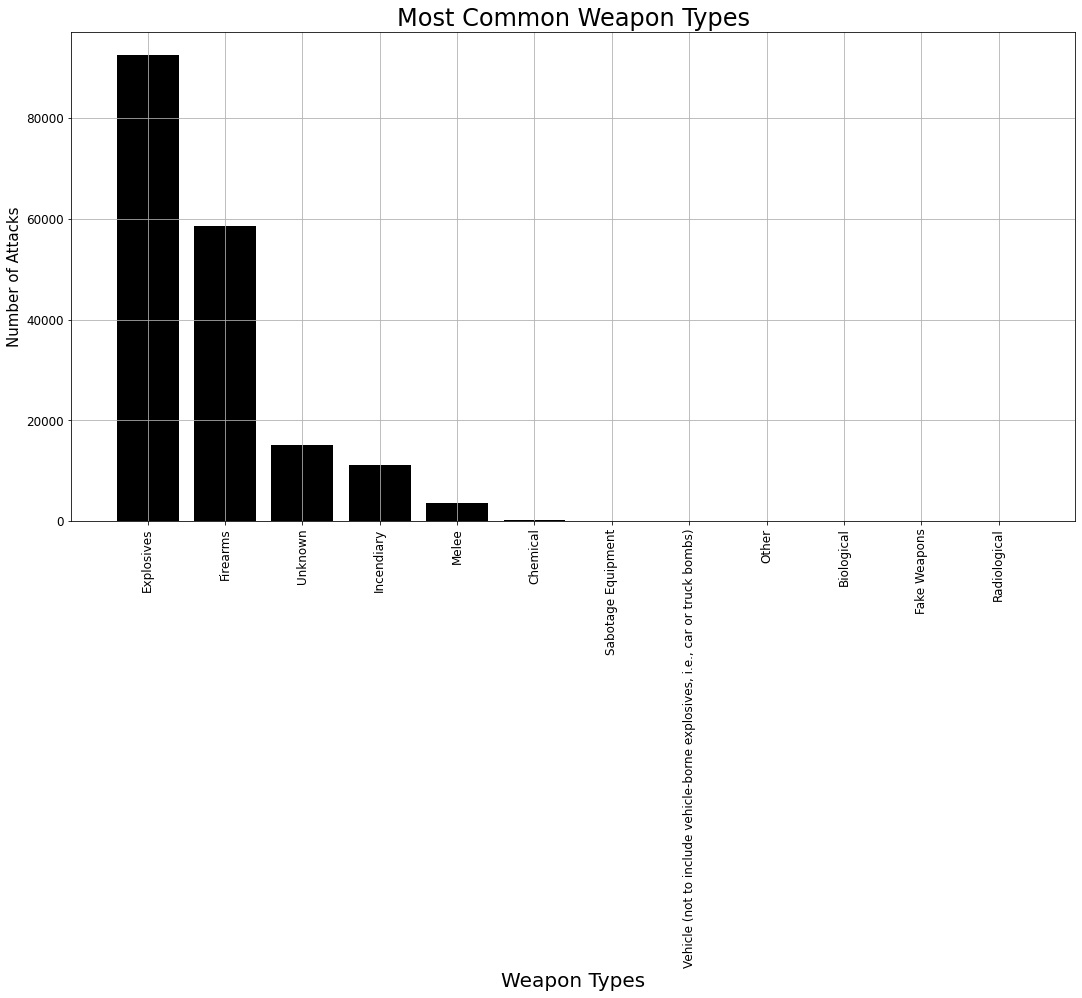

In [17]:
weapon_type=ds.groupby("Weapon_type")["Event_id"].count().nlargest(15)


plt.figure(figsize=(18,9))
plt.bar(weapon_type.index,weapon_type,width=0.8, color = 'black')
plt.title("Most Common Weapon Types",fontsize=24)
plt.xlabel("Weapon Types",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

**Note: Explosives are the most common types of weapons used for terrorist activities.**

# Most Active Terrorist Groups

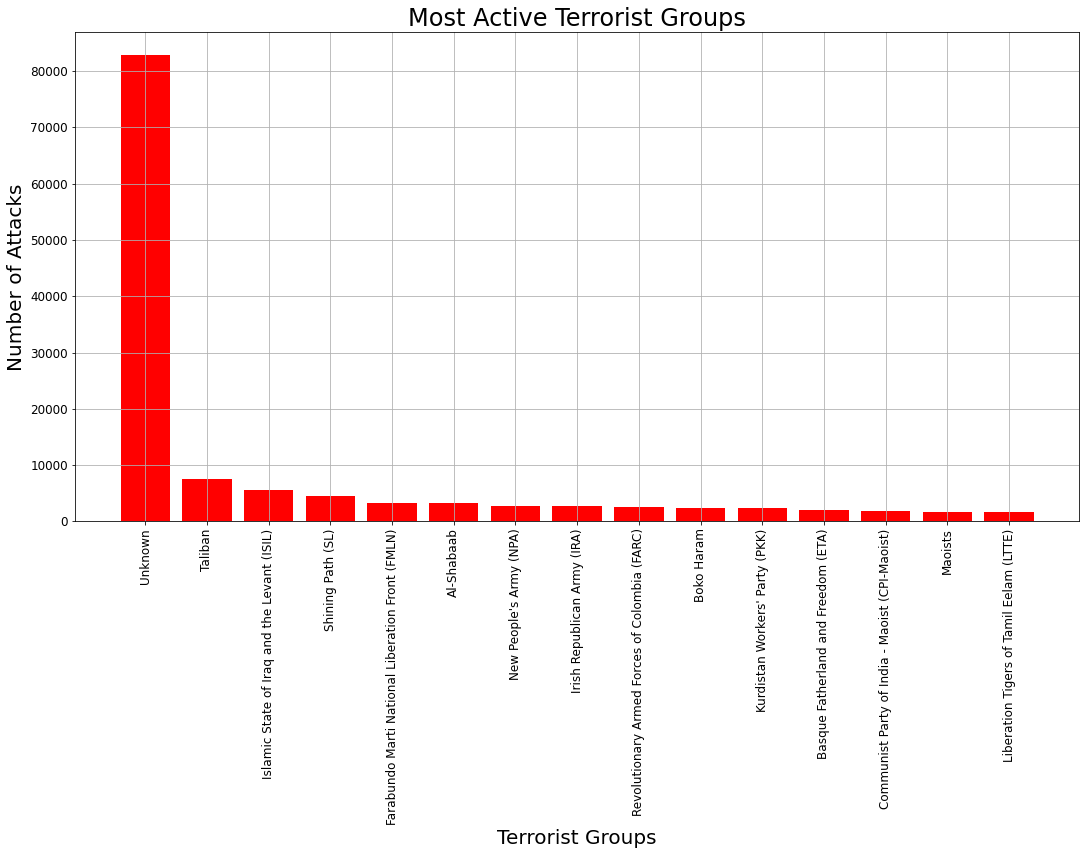

In [18]:
terrorist_groups=ds.groupby("Group_name")["Event_id"].count().nlargest(15)

plt.figure(figsize=(18,9))
plt.bar(terrorist_groups.index,terrorist_groups,width=0.8, color = 'red')
plt.title("Most Active Terrorist Groups",fontsize=24)
plt.xlabel("Terrorist Groups",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

**Note: The second most active group is Taliban.**

# Conclusions
**Hot Zones**
1. Most affected country is Iraq.
2. Most affected region is Middle East and North Africa.
3. Most affected state is Baghdad.
4. Most affected year is 2014.

**Security Issues**
1. Private Citizens and Properties are commonly targeted by terrorist groups.
2. Bombing/Explotion is the most common type among the attack types.
3. Explosives are the most common types of weapons used for terrorist activities.